Search Book Cover By KeyPoints and Local Invariant Descriptors

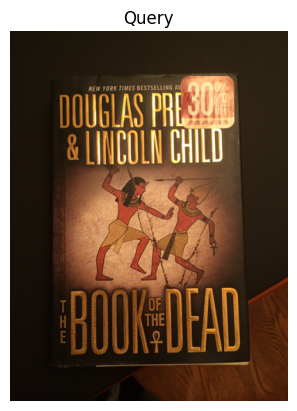

1. 79.59% : Preston and Child - The Book of the Dead


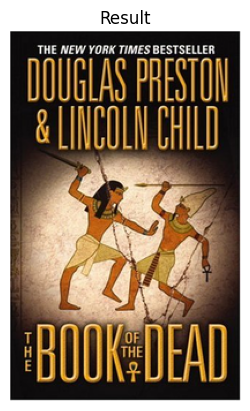

In [4]:
import cv2
import glob
import csv
from coverdescriptor import CoverDescriptor
from coverrepo import CoverRepo
from helper import draw

db = {}
coverDir = "covers"
queryImagePath = "queries/query05.png"

for l in csv.reader(open("books.csv")):
    db[l[0]] = l[1:]

useSIFT = False
useHamming = not useSIFT
ratio = 0.7
minMatches = 40

if useSIFT:
    minMatches = 50

cd = CoverDescriptor(useSIFT)
repo = CoverRepo(cd, glob.glob(coverDir + "/*.png"), ratio=ratio, 
    minMatches=minMatches, useHamming=useHamming)

queryImage = cv2.imread(queryImagePath)
gray = cv2.cvtColor(queryImage, cv2.COLOR_BGR2GRAY)

(queryKps, queryDescs) = cd.describe(gray)

results = repo.search(queryKps, queryDescs)

draw("Query", queryImage)

if len(results) == 0:
    print("I could not find a match for that cover!")
else:
    for (i, (score, coverPath)) in enumerate(results):
        (author, title) = db[coverPath[coverPath.rfind("/") + 1 : ]]
        print("{}. {:.2f}% : {} - {}".format(i + 1, score * 100, author, title))

        result = cv2.imread(coverPath)
        draw("Result", result)
